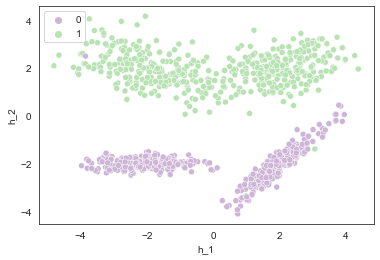

In [1]:
import sklearn.datasets as datasets
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# create a random classification dataset
hidden, labels = datasets.make_classification(n_samples=1000, n_features=2, n_informative=2,
                                              n_redundant=0, class_sep=2, random_state=0)

# convert data into a dataframe
hidden = pd.DataFrame(list(zip(list(hidden.T[0]), list(hidden.T[1]))), columns =['h_1', 'h_2'])

# plot the data with labels
sns.set_style('white')
sns.set_palette('PRGn', 2)
sns.scatterplot(data=hidden, x='h_1', y='h_2', hue=labels)
plt.show()

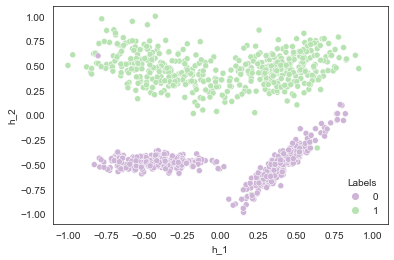

In [2]:
# normalize the data to be between -1 and 1
column_maximum = lambda x: max(x.min(), x.max(), key=abs)
normalization_constants = abs(hidden.apply(column_maximum, axis=0))
hidden = hidden / normalization_constants

# plot the normalized data distribution
sns.scatterplot(data=hidden, x='h_1', y='h_2', hue=labels)
plt.legend(title='Labels', loc=4, frameon=False)
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.savefig('figures/generated_h.png', dpi=200)
plt.show()

In [5]:
import numpy as np

def relu(x):
    return x * (x > 0)

x_1 = np.sin(hidden['h_1']) + np.tanh(hidden['h_2'])
x_2 = relu(hidden['h_1']) + np.exp(hidden['h_2'])
x_3 = abs(hidden['h_1']) + np.cos(hidden['h_2'])

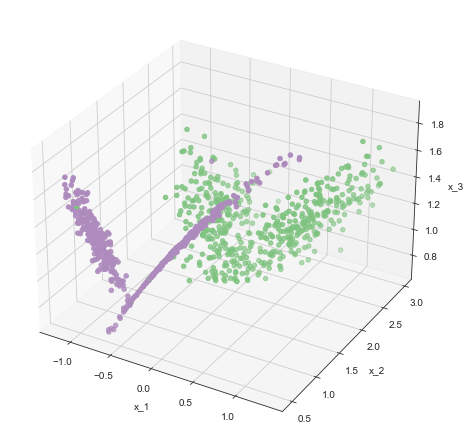

In [6]:
from pylab import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

sns.set_palette('viridis', 2)

fig = plt.figure(figsize=(7,6))
ax = Axes3D(fig)

purple_green = ListedColormap(sns.color_palette('PRGn', 3))

ax.scatter(x_1, x_2, x_3, c=labels, marker='o', cmap=purple_green)
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('x_3')

plt.savefig('figures/non_linear_observations_space.png', dpi=200)
plt.show()